<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Функция-кодирования" data-toc-modified-id="Функция-кодирования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция кодирования</a></span></li><li><span><a href="#Проверка-на-незакодированных-данных" data-toc-modified-id="Проверка-на-незакодированных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на незакодированных данных</a></span></li><li><span><a href="#Проверка-на-закодированных-данных" data-toc-modified-id="Проверка-на-закодированных-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Проверка на закодированных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Финальные-комментарии-ревьюера" data-toc-modified-id="Финальные-комментарии-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Финальные комментарии ревьюера</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


## Загрузка данных

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import resources, report

In [3]:
df=pd.read_csv('/datasets/insurance.csv')

In [4]:
#функция для чтения дф
def info(df):
    display(df.head())
    display(df.info())
    display(df.describe())
    print('Количество дубликатов:',df.duplicated().sum())
    #Матрица кореляции
    plt.figure(figsize=(10,10))
    corr_matrix = sns.heatmap(df.phik_matrix(),annot=True)
    corr_matrix.axes.set_title("Корреляционная матрица",fontsize=16)
    plt.show()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Количество дубликатов: 153
interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


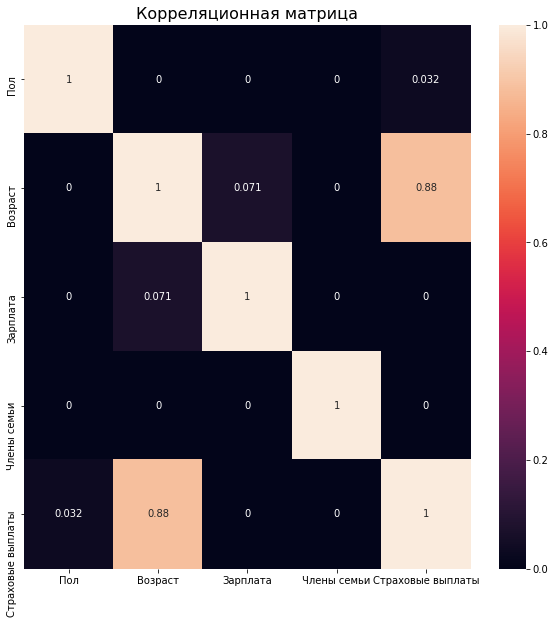

In [5]:
info(df)

### Вывод

Данные загружены и изучены

- Наблюдается балланс между гендарами

- Минимальный возраст страхования 18 лет средний 31 максимальный 65

- Средняя З/П 40т.р

Все эти признаки говорят о том,что страховая специализируется на среднем классе

Наблюдается несколько корелляций

- Корреляция между Страховыми выплатами и Гендером практически равна 0

- Корреляция между З/П и Возрастом  слабая

- Наблюдается сильная взаисмосвязь между Страховыми выплатами и Возрастом

Имеются дубликаты,возможно реальное совпадение данных.Так как на иследование это влияние не окажет -оставим как есть все

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос**

Изменится ли качество линейной регрессии?

**Ответ:** нет не измениться

**Обоснование:** Рассмотрим как связаны параметры линниейной регрессии в исходной задаче и преобразованной

**Первое действие**

Подставим в формулу $a = Xw $ значения  $w$ из формулы выше
$$
a = X (X^T X)^{-1} X^T y
$$
Так вычисляются предсказания для не преобразованных признаков."

**Второе действие**

Преобразованные признаки $M$ - это матрица признаков $X$ умноженная на обратимую матрицу $P$: $M = XP$
Для преобразованных признаков формула предсказаний примет вид
$$
a_m = M (M^T M)^{-1} M^T y = XP ((XP)^T (XP))^{-1} (XP)^T y
$$

**Третье действие**

воспользуемся свойствами матриц: $(AB)^T = B^TA^T$:
$$
a_m = XP (P^TX^TXP)^{-1} P^TX^T y
$$

$$
XPP^{-1}(X^TX)^{-1}(P^T)^{-1} P^T X^T y
$$

**Четвертое действие**

воспльзуемся свойствами обратных матриц: $(AB)^{-1} = B^{-1}A^{-1}$


$$
a_m=XPP^{-1}(X^TX)^{-1}(P^T)^{-1} P^T X^T y
$$

$$
a_m=X(X^TX)^{-1} X^T y
$$

$$
a_m=a
$$

$E$ - единичная матрица

**Пятое действие**

Так как $PP^{-1} = E$, а умножение любой матрица на единичную матрицу даёт ту же матрицу $AE=A$



$$
a_m = XE(X^TX)^{-1} E X^T y = X(X^T X)^{-1} X^T y
$$

$$
a_m = a
$$

## Алгоритм преобразования

**Алгоритм**

- Сгенерировать сучайную матрицу размером: $X$ будет размера $2Х4$:

- Создадим обратимую(кодирующую) матрицу $P$ размером $2Х2$: 

- Умножим матрицу признаков на кодирующую матрицу получим закодированную матрицу $M=XP$"

- Сравним метрики r2,по итогу они должны быть практически равны


**Обоснование**

Проверим на простом наборе данных 

In [6]:
#матрица признаков 2х4

X=np.array([[1,2],
            [2,3],
            [3,4],
            [4,5]
           ]
          )
X

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

In [7]:
# целевой признак - вектор 

y=np.array([1,2,3,4])
y

array([1, 2, 3, 4])

In [8]:
# обратимая кодирущая матрица 2х2

P=np.random.randint(1,10,(2,2))
P

array([[8, 2],
       [5, 8]])

In [9]:
# закодированая матрица

M=X @ P
M


array([[18, 18],
       [31, 28],
       [44, 38],
       [57, 48]])

In [10]:
# вектор прогнозов по формуле из 2ого действия

a_M=M @ np.linalg.inv(M.T @ M) @ M.T @ y
a_M

array([1., 2., 3., 4.])

### Вывод

Видно что результат на закодированных и не закодированных признаках -одинаковый

Осталось применить алгоритм к реальным данным и проверить результат

## Проверка алгоритма

### Функция кодирования

In [11]:
def coding(matrix):
    np.random.seed(12345)
    if type(matrix)==pd.core.frame.DataFrame or type(matrix)==pd.core.series.Series: # Принимает датафрейм признаков
        matrix=matrix.values
    range_matrix=matrix.shape[1]
    determinant=0
    while determinant==0:
        key_matrix=np.random.randint(1,100,(range_matrix,range_matrix))
        determinant=np.linalg.det(key_matrix)
    return matrix @ key_matrix,key_matrix

### Проверка на незакодированных данных

In [12]:
# Создание выборки
features=df.drop('Страховые выплаты',axis=1)
target=df['Страховые выплаты']

# Разделение выборки

features_train,features_test,target_train,target_test=train_test_split(features,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=333)


In [13]:
model=LinearRegression()
model.fit(features_train,target_train)
predictions=model.predict(features_test)
print('Коэффициент детерминации: ',r2_score(target_test,predictions))

#посмотрим массив весов
model.coef_

Коэффициент детерминации:  0.3953196811703078


array([ 4.22847369e-03,  3.63039370e-02, -3.00900469e-07, -1.30826169e-02])

### Проверка на закодированных данных

In [14]:
features_coding, coding_matrix = coding(features)

features_coding_train,features_coding_test,target_train,target_test=train_test_split(features_coding,
                                                                        target,
                                                                        test_size=0.25,
                                                                        random_state=333)
print(coding_matrix)

[[99 30  2 37]
 [42 35 30  2]
 [60 15 92 81]
 [74 12 78 11]]


In [15]:
model=LinearRegression()
model.fit(features_coding_train,target_train)
predictions=model.predict(features_coding_test)
print('Коэффициент детерминации: ',r2_score(target_test,predictions))

#посмотрим массив весов
model.coef_

Коэффициент детерминации:  0.3953196811697769


array([-4.41315176e-04,  1.55928776e-03,  6.77370265e-06,  3.04458346e-05])

### Вывод

- Была написана функция кодирования моделей: **coding**

- Осуществлена проверка на незакодированных данных

- Осуществлена проверка на закодированных данных

Из сравнения метрик качества и моделей видно,кодированние данных никак не сказалось на работаспособности модели

## Вывод

- На этапе загрузки данных явных проблем выявлено не было

- На этапе Умножения матриц был дан ответ,что кодирование никак не влияет на работату модели

- На этапе Алгоритм преобразования был проверен алгоритм на собственном наборе данных

- На этапе Проверка алгоритма была проведенена проверка на реальных данных,которая подтвердила что работа данного аллгоритма одинакова как на незакодированных данных так и на закодированных данных


Цель была достигнута,был разроботан метод защиты персональных данных клиентов,который никак не влияет на работу модели



## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования